In [155]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import json
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [156]:
df = pd.read_csv('Data/Population.csv')
df.head()
master_df = pd.DataFrame()
Countries = []
Countries = df['CountryID'].unique()
Years = [2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
Years


[2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]

In [175]:
country = 'USA'

df = df.loc[df['CountryID'] == country]

In [176]:
X = df["Year"].values.reshape(-1, 1)
y = df["Population"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (61, 1) (61, 1)


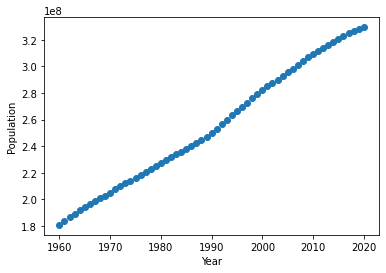

In [177]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()
### END SOLUTION

In [178]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [179]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [180]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression()

In [181]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 6164809001619.57
R-squared (R2 ): 0.9974561089711435


In [182]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.9974561089711435

In [183]:
country_l = []
Population = []
for year in Years:
    result = int(model.coef_[0][0] * year + model.intercept_[0])
    country_l.append(country.upper())
    Population.append(result)
    print(f"Results for {country.upper()} the year {year} will be {result:,d}")


Results for USA the year 2021 will be 334,586,620
Results for USA the year 2022 will be 337,158,965
Results for USA the year 2023 will be 339,731,311
Results for USA the year 2024 will be 342,303,656
Results for USA the year 2025 will be 344,876,001
Results for USA the year 2026 will be 347,448,347
Results for USA the year 2027 will be 350,020,692
Results for USA the year 2028 will be 352,593,037
Results for USA the year 2029 will be 355,165,383
Results for USA the year 2030 will be 357,737,728


In [184]:
print(country_l)

['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA']


In [185]:
print(Population)

[334586620, 337158965, 339731311, 342303656, 344876001, 347448347, 350020692, 352593037, 355165383, 357737728]


In [186]:
print(Years)

[2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]


In [187]:
result_df = pd.DataFrame({'CountryID':country_l, 'Year':Years, 'Population':Population})

In [190]:
result_df

,CountryID,Year,Population
0,USA,2021,334586620
1,USA,2022,337158965
2,USA,2023,339731311
3,USA,2024,342303656
4,USA,2025,344876001
5,USA,2026,347448347
6,USA,2027,350020692
7,USA,2028,352593037
8,USA,2029,355165383
9,USA,2030,357737728
